# Wyniki dla 10000 rekordow z calej macierzy - grudzien 2018

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format

* trips

In [2]:
trips = pd.read_csv('data//10000.csv')
del trips['Unnamed: 0']

In [3]:
trips.head() 

,Z_Rejon,POI,Do_Rejon,Czas_PrT,Czas_PuT,time_left_PrT,time_left_PuT,TripsPrT,TripsPuT,odPair
0,1,30,1,3.40,0.20,86.24,89.44,0.04,0.05,1001
1,1,174,1,41.63,8.38,48.01,81.27,0.04,0.05,1001
2,1,178,1,38.33,6.99,51.32,82.65,0.04,0.05,1001
3,1,74,1,37.77,8.28,51.87,81.36,0.04,0.05,1001
4,1,154,1,37.84,8.31,51.80,81.33,0.04,0.05,1001


###  column description:
* Z_rejon $j$
* POI $k$
* Do_Rejon $i$
* Czas_PrT $c^{PrT}_{jki} = c_{jk}  + c_{k} + c_{ki}$
* Czas_PuT $c^{PuT}_{jki}$
* time_left_PrT $ B - c^{PrT}_{jki}$
* time_left_PuT $ B - c^{PuT}_{jki}$
* TripsPrT + TripsPuT = $X_{ij}$


### filtr dla T_ij >0.1

In [4]:
trips = trips[(trips.TripsPuT + trips.TripsPrT) > 0.1]
trips = trips[trips.Czas_PrT < trips.Czas_PrT.quantile(0.95)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F90D7B8>,
      dtype=object)

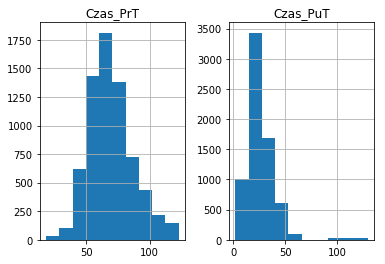

In [5]:
trips[['Czas_PrT','Czas_PuT']].hist()

## prepare

In [6]:
BUDGET_PRT = trips['Czas_PrT'].quantile(0.5) # przyjmuje ze liczy sie tylko dolna polowa czasow
BUDGET_PUT = BUDGET_PRT
trips['time_left_PrT']=BUDGET_PRT - trips.Czas_PrT # ile czasu zostaje ponizej budzetu w POI
trips['time_left_PuT']=BUDGET_PUT - trips.Czas_PuT
trips.Z_Rejon = trips.Z_Rejon.astype(int)
trips.Do_Rejon = trips.Do_Rejon.astype(int)

# OD pairs-based analysis:
## 1. number of POI available (nPOIs.csv)
- total minutes
- mean/median minutes

In [9]:
print('number of POIs within budget per OD Pair - PuT/PrT')
nPOIs = trips[trips.Czas_PrT<BUDGET_PRT].groupby(by=['Z_Rejon',"Do_Rejon"])['POI'].nunique().to_frame('nPOIsPRT')
nPOIs['nPOIsPUT'] = trips[trips.Czas_PuT<BUDGET_PUT].groupby(by=['Z_Rejon',"Do_Rejon"])['POI'].nunique()
nPOIs = nPOIs.reset_index()
nPOIs.head()

number of POIs within budget per OD Pair - PuT/PrT


,Z_Rejon,Do_Rejon,nPOIsPRT,nPOIsPUT
0,1,6,97,130
1,1,111,88,128
2,1,114,81,128
3,1,117,72,127
4,1,118,77,128


###  nPOIS.csv column description:
* Z_Rejon $j$
* Do_Rejon $i$
* nPOIsPRT - liczba $k$ dla których $c^{PrT}_{jki}<B$
* nPOIsPuT - liczba $k$ dla których $c^{PuT}_{jki}<B$

## 2. mean/median time available (times.csv)

In [10]:
print("time per OD pair  PrT")
t1 = trips[trips.Czas_PrT<BUDGET_PRT].groupby(
    by=['Z_Rejon',"Do_Rejon"])['Czas_PrT', 'time_left_PrT'].agg(['sum','mean','median']).reset_index()
t2.to_csv('data//timesPuT.csv')
t1.head()

time per OD pair  PrT


Z_Rejon Do_Rejon Czas_PrT              time_left_PrT             
                        sum  mean median           sum  mean median
0       1        6 5,002.20 51.57  51.74      1,517.66 15.65  15.48
1       1      111 4,922.16 55.93  60.66        992.76 11.28   6.56
2       1      114 4,626.30 57.11  60.85        818.11 10.10   6.36
3       1      117 4,094.36 56.87  61.08        745.12 10.35   6.14
4       1      118 4,481.52 58.20  61.74        694.04  9.01   5.48

In [11]:
print("time per OD pair PuT")
t2 = trips[trips.Czas_PuT<BUDGET_PUT].groupby(
    by=['Z_Rejon',"Do_Rejon"])['Czas_PuT', 'time_left_PuT'].agg(['sum','mean','median']).reset_index()
t2.to_csv('data//timesPuT.csv')
t2.head()

time per OD pair PuT


Z_Rejon Do_Rejon Czas_PuT              time_left_PuT             
                        sum  mean median           sum  mean median
0       1        6 2,590.26 19.93  16.57      6,147.69 47.29  50.65
1       1      111 2,973.63 23.23  20.53      5,629.89 43.98  46.68
2       1      114 3,048.14 23.81  21.10      5,555.38 43.40  46.12
3       1      117 2,999.37 23.62  20.99      5,536.94 43.60  46.22
4       1      118 3,069.23 23.98  21.08      5,534.29 43.24  46.14

###  column description:
* Z_rejon $j$
* Do_Rejon $k$
* Czas_PuT, grupa wszystkich czasow dojazdu w relacji $jki$ dla danego $j$ oraz $i$ oraz dowolnego $k$ i dla niej: 
    * suma wszystkich czasów
    * średnia
    * mediana
* time_left_PuT, grupa wszystkich pozostałych czasów dojazdu w relacja $jki$ dla których $B>0$ i pozostały czas $B - c^{PuT}_{jki}$ i dla nich:
    * suma wszystkich czasów
    * średnia
    * mediana